In [2]:
import keras
from keras.datasets import cifar10


2024-11-23 11:58:13.962172: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-23 11:58:13.975506: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-23 11:58:14.067372: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-23 11:58:14.155284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-23 11:58:14.251082: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

2. visualize the first 24 training images

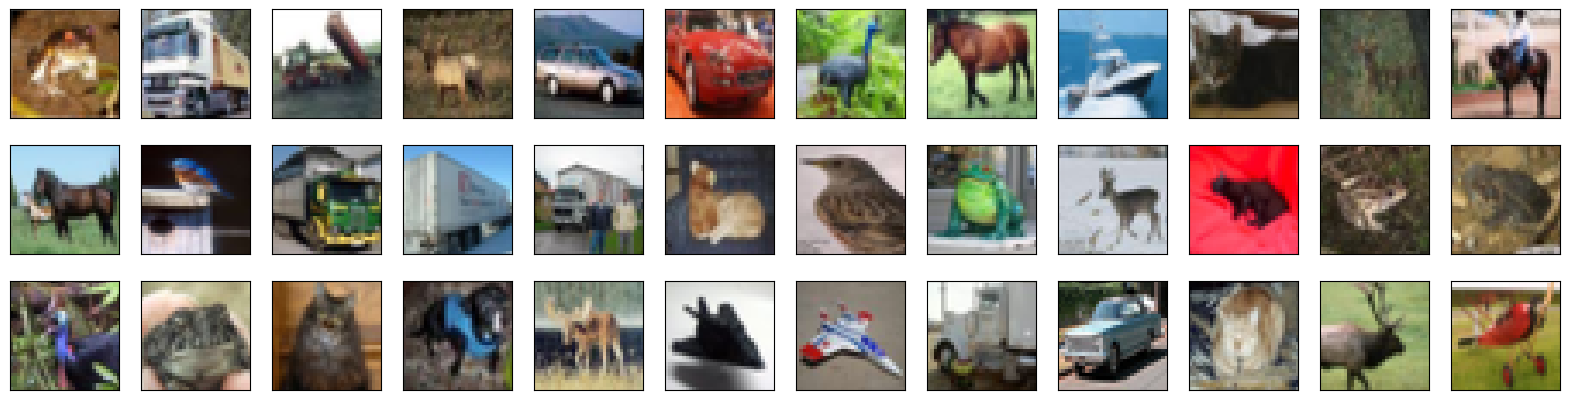

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12, i+1, xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

3.rescale the image by dividing every pixel in every image by 255

In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

4.break dataset into training testing and validation set

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
# %pip install keras.utils
%pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [11]:
from keras.api.utils import to_categorical
num_classes=len(np.unique(y_train)) 
y_train=keras.utils.to_categorical(y_train,num_classes) 
y_test=keras.utils.to_categorical(y_test,num_classes) 
(x_train,x_valid)=x_train[5000:],x_train[:5000] 
(y_train,y_valid)=y_train[5000:],y_train[:5000] 
print('x_train shape:',x_train.shape) 
print(x_train.shape[0],'train samples') 
print(x_test.shape[0],'test samples') 
print(x_valid.shape[0],'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


5.define the model architecture

In [12]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath = 'model.weights.best.keras',verbose = 1,save_best_only=True)
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_valid, y_valid),callbacks=[checkpointer],verbose=1,shuffle=True)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3418 - loss: 1.7679
Epoch 1: val_loss improved from inf to 1.25444, saving model to model.weights.best.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.3419 - loss: 1.7676 - val_accuracy: 0.5408 - val_loss: 1.2544
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5529 - loss: 1.2563
Epoch 2: val_loss improved from 1.25444 to 1.07926, saving model to model.weights.best.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.5529 - loss: 1.2562 - val_accuracy: 0.6194 - val_loss: 1.0793
Epoch 3/10
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6147 - loss: 1.0816
Epoch 3: val_loss improved from 1.07926 to 0.95833, saving model to model.weights.best.keras
704/704 ━━━━━━━━━━━━━━━━━━━━ 35s 50ms/step - accuracy: 0.6148 - loss: 1.0816 - val_accuracy: 0.6636 - val_loss: 0.9583
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6535 - loss: 0.9750
Epoch 4: val_loss im

In [15]:
model.load_weights('model.weights.best.keras')

In [16]:
y_hat = model.predict(x_test)

cifar10_label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step


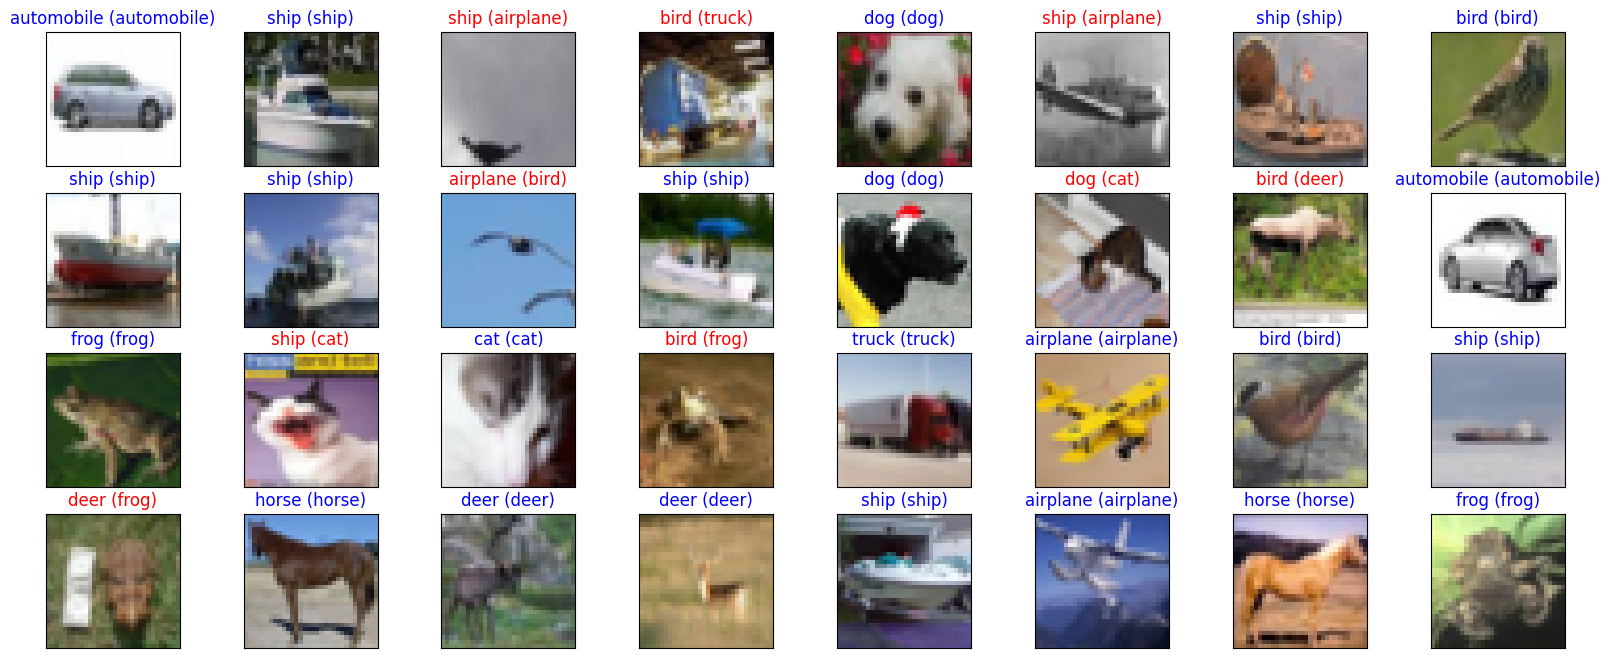

In [17]:
fig= plt.figure(figsize=(20,8))
for i, idx in enumerate(np.random.choice(x_test.shape[0],size=32,replace=False)):
    ax=fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx=np.argmax(y_hat[idx])
    True_idx=np.argmax(y_test[idx])
    ax.set_title('{} ({})'.format(cifar10_label[pred_idx],cifar10_label[True_idx]),color=("blue" if pred_idx==True_idx else 'red'))

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 4s - 14ms/step - accuracy: 0.7343 - loss: 0.7544
Test accuracy: 0.7343000173568726


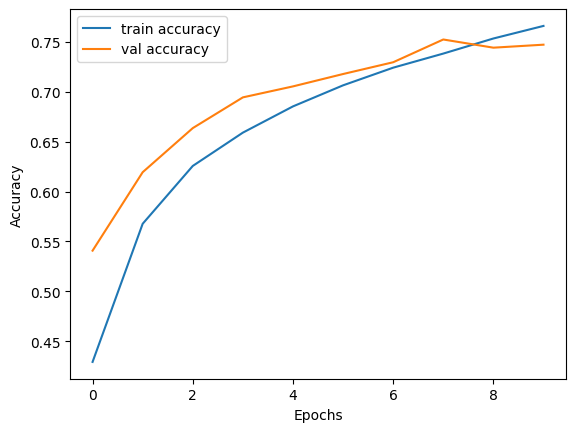

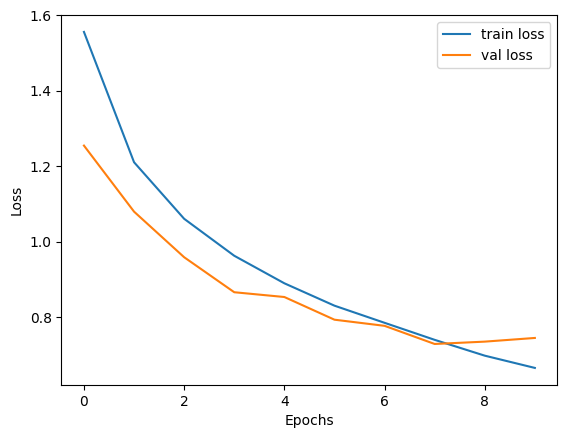

In [22]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [23]:
# Make predictions on the test set
predictions = model.predict(x_test)

# Print the class with the highest probability for the first test image
predicted_class = np.argmax(predictions[0])
print(f'Predicted class: {predicted_class}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
Predicted class: 3
